In [2]:
# step 1: import the libraries and upload the dataset 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from lime import lime_tabular
from sklearn.inspection import permutation_importance
#below is a new package needed for this lab
from ucimlrepo import fetch_ucirepo 
from sklearn.preprocessing import OneHotEncoder

import os

os.chdir("/Users/lucaslisman/Desktop/DS 3001/")


In [3]:
# open the dataset.csv file 
music = pd.read_csv('dataset.csv')
# inspect the types of each column
music.dtypes


Unnamed: 0            int64
track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object

In [15]:
music1 = music[(music['track_genre'] == 'country') |  (music['track_genre'] == 'disney') | (music['track_genre'] == 'hip-hop') | (music['track_genre'] == 'pop') | (music['track_genre'] == 'rock')]

In [16]:
# check how many nas 
music.isna().sum()
# not too many nas, so we can drop them 
music = music.dropna()

/var/folders/gz/7h0l2_4j6fld7vp7x2k94bhr0000gn/T/ipykernel_81093/2038177445.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr =music1.corr()


<Axes: >

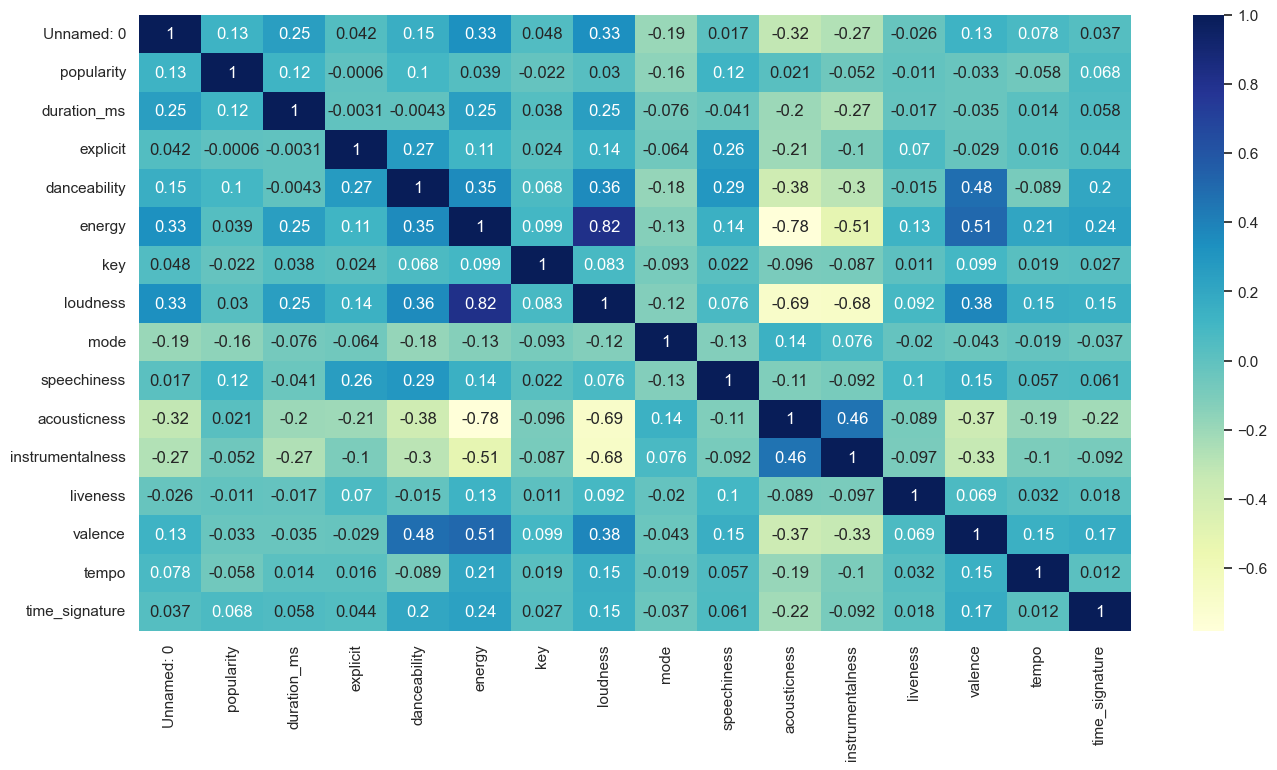

In [19]:
#Correlation
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
corr =music1.corr()
sns.heatmap(corr,annot=True, cmap="YlGnBu")

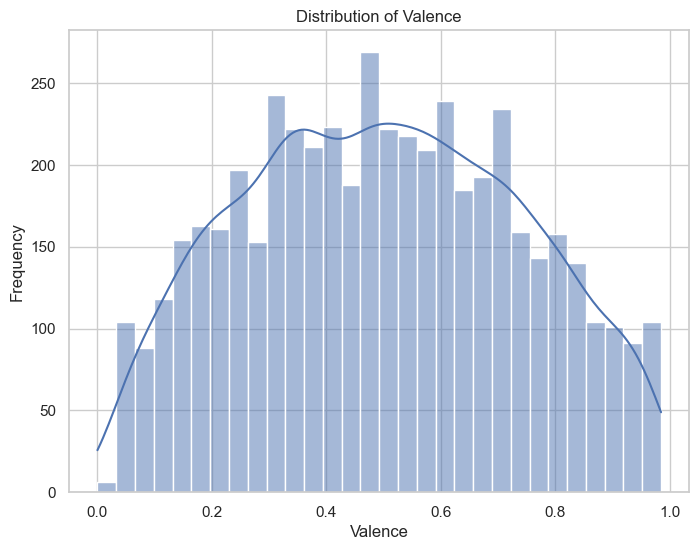

In [20]:
import seaborn as sns


# Distribution of the target variable (danceability)
plt.figure(figsize=(8, 6))
sns.histplot(music1["valence"], bins=30, kde=True)
plt.title("Distribution of Valence")
plt.xlabel("Valence")
plt.ylabel("Frequency")
plt.show()

                                 Numeric Features Distribution                                  


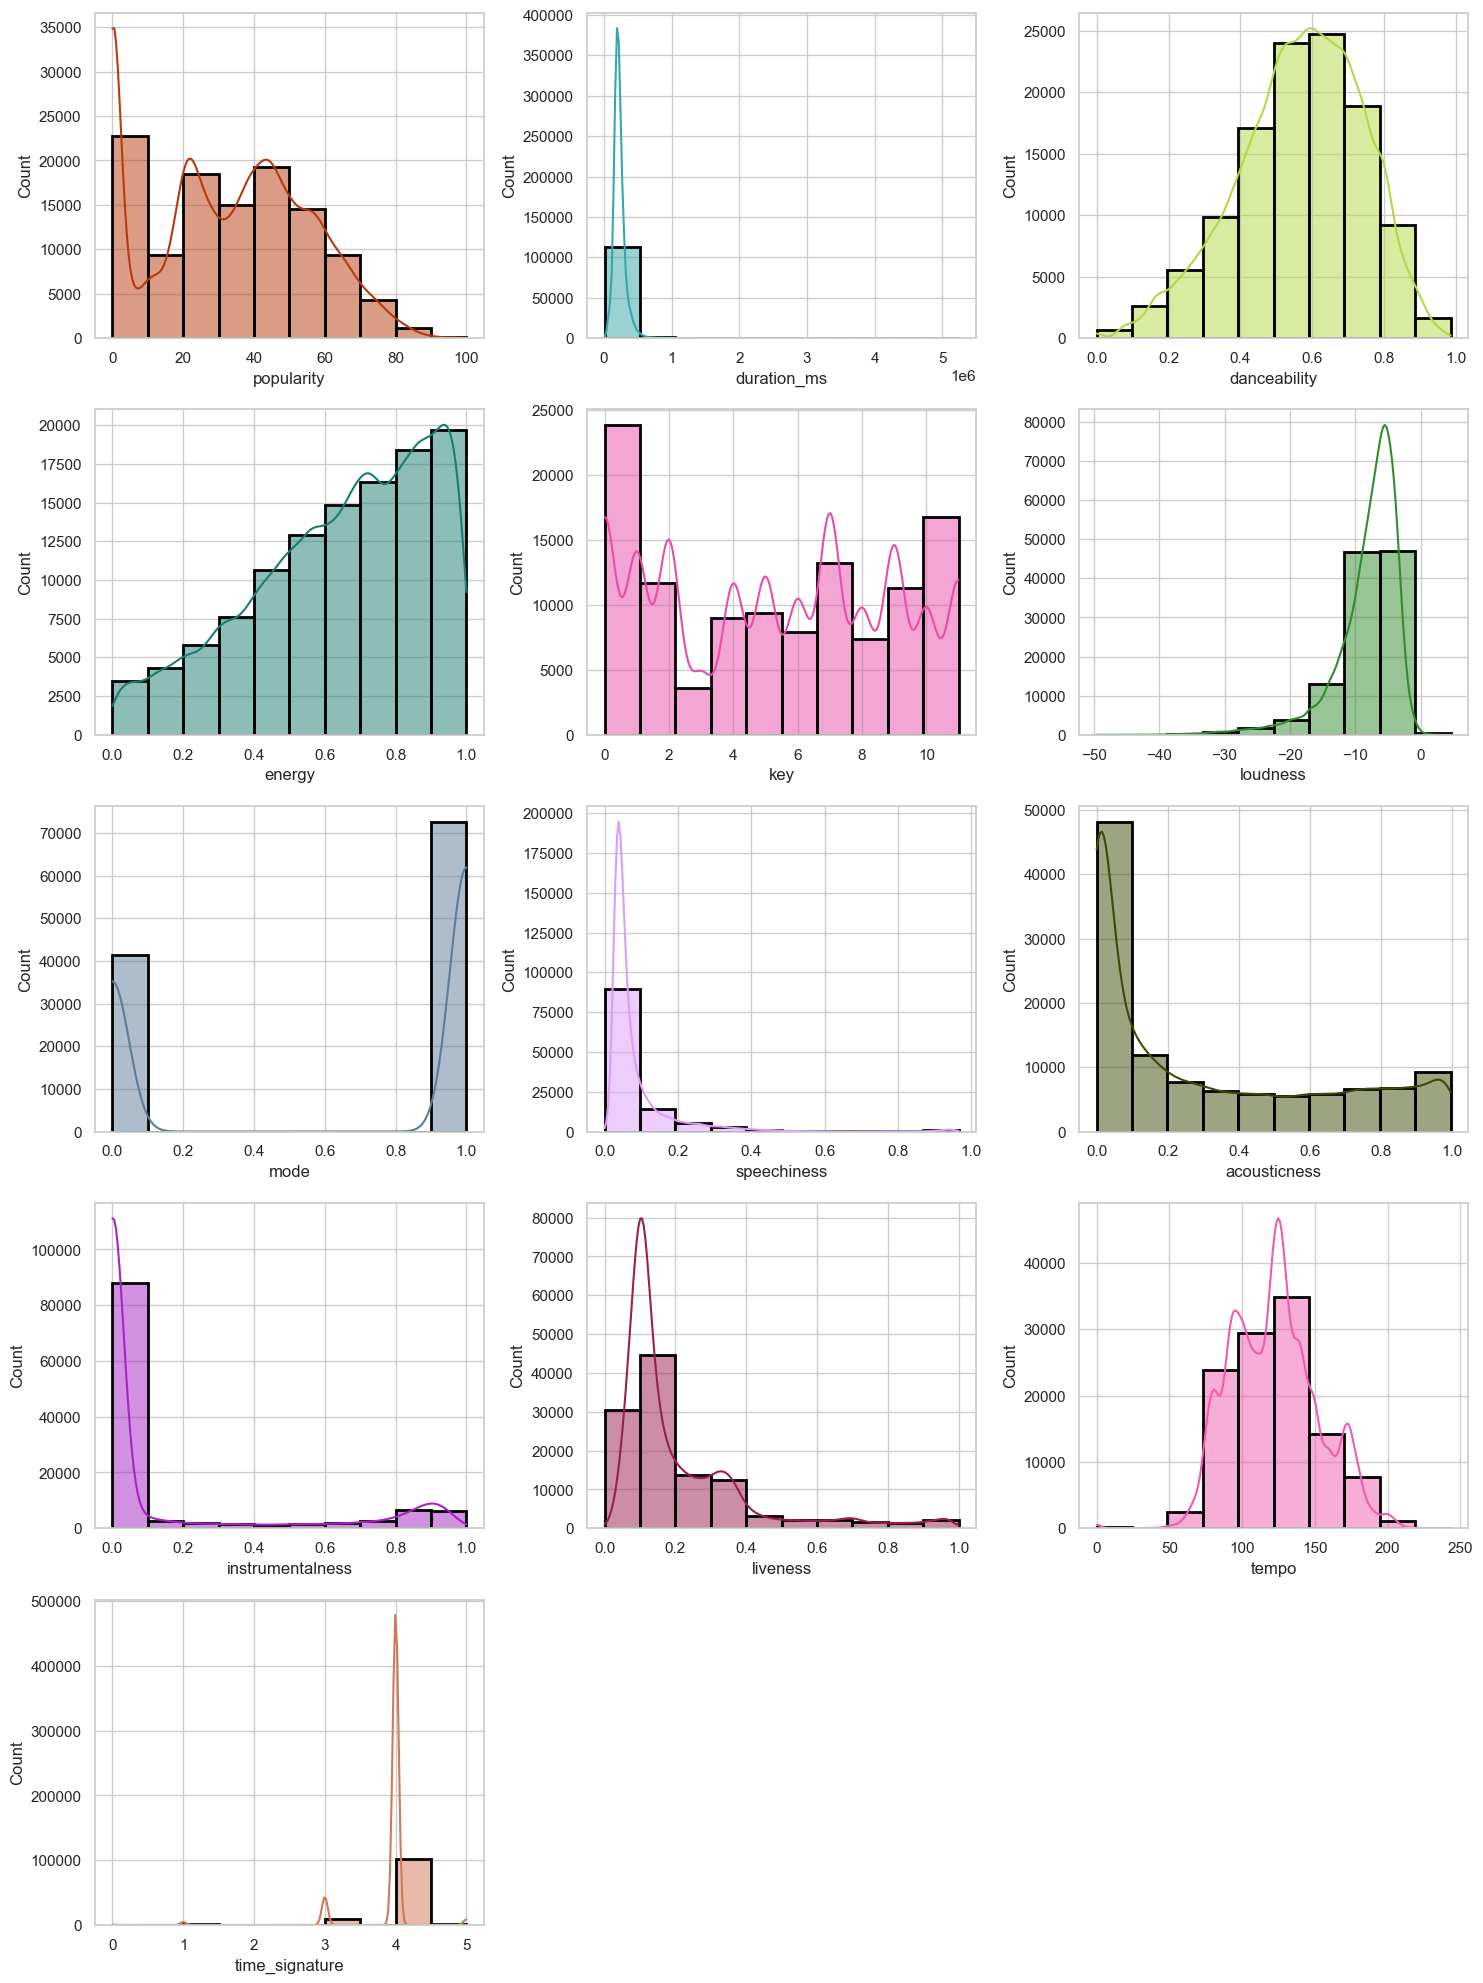

In [21]:
#Numeric Feature Distribution

import math


target_column = 'valence'
numerical_features = music1.select_dtypes(include=['int64', 'float64']).columns
numerical_features = numerical_features.drop(target_column)
# drop unnamed column
numerical_features = numerical_features.drop('Unnamed: 0')


print('\033[1mNumeric Features Distribution'.center(100))

# Define number of subplots per row
subplots_per_row = 3
num_rows = math.ceil(len(numerical_features) / subplots_per_row)

plt.figure(figsize=[15, 4 * num_rows])

for i, feature in enumerate(numerical_features):
    plt.subplot(num_rows, subplots_per_row, i + 1)
    sns.histplot(
        music[feature],
        kde=True,  # Add a kernel density estimate
        color=list(np.random.randint([255, 255, 255]) / 255),
        edgecolor="black", 
        linewidth=2,
        bins=10
    )

plt.tight_layout()
plt.show()